In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Transform Class

In [2]:
class Transform:
    def __init__(self):
        pass
    @staticmethod
    def origin():
        return np.zeros((2,))
    @staticmethod
    def ident():
        return np.identity(2)
    @staticmethod
    def rotation(theta):
        return np.array([
            [np.cos(theta), -np.sin(theta)],
            [np.sin(theta),  np.cos(theta)]
        ])
    @staticmethod
    def scale(k, axis=0):
        I = Transform.ident()
        I[axis,axis] *= k
        return I
    @staticmethod
    def shear(k, axis=0):
        I = Transform.ident()
        I[axis,1-axis] = k
        return I
    @staticmethod
    def symmetry(axis=0, flip=False):
        I = Transform.ident()
        if not(axis is None):
            I[axis,axis] = -1
        if flip:
            I = np.flipud(I)
        return I
    @staticmethod   
    def plot(A, x=None, title='', lims=[-3, 3]):
        if x is None:
            x = np.array([[1,1],[1,2],[2,2], [2,1], [1,1], [0.5,1.5], [1,2]])
        t = np.linspace(0, 2*np.pi, 101)
        O = Transform.origin()
        U, S, V = np.linalg.svd(A)
        fig, axe = plt.subplots()
        axe.plot(*O, 'ob', markersize=2., label='Origin')
        axe.plot(np.cos(t), np.sin(t), label='Unit Circle')
        axe.plot(*x.T, label='Preimage')
        axe.plot(*(A.dot(x.T)), label='Image')
        axe.quiver(*O, *np.matmul(U, np.diag(S)), units='xy', scale=1)
        axe.set_title("2D Transformation: %s" % title)
        axe.set_xlabel(r"$x_0$")
        axe.set_ylabel(r"$x_1$")
        axe.set_xlim(lims)
        axe.set_ylim(lims)
        axe.grid()
        axe.legend(bbox_to_anchor=(1,1), loc='upper left')
        axe.set_aspect('equal')
        return fig

## Identity

In [3]:
A = Transform.ident()
A

array([[1., 0.],
       [0., 1.]])

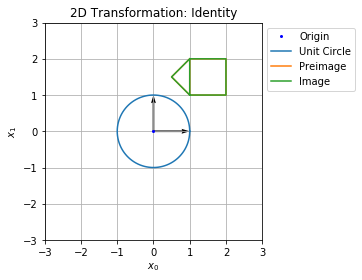

In [4]:
fig = Transform.plot(A, title="Identity")

## Rotation

In [5]:
A = Transform.rotation(np.pi/8)
A

array([[ 0.92387953, -0.38268343],
       [ 0.38268343,  0.92387953]])

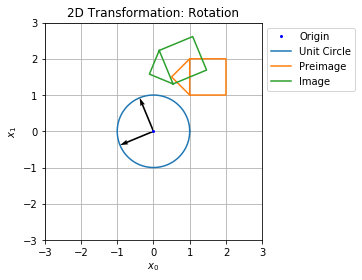

In [6]:
fig = Transform.plot(A, title="Rotation")

In [7]:
A = Transform.rotation(np.pi/4)
A

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [8]:
np.linalg.svd(A)

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]), array([1., 1.]), array([[-1., -0.],
        [ 0.,  1.]]))

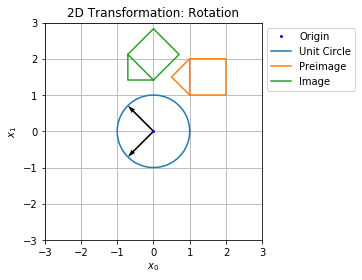

In [9]:
fig = Transform().plot(A, title="Rotation")

In [10]:
A = Transform.rotation(np.pi)
A

array([[-1.0000000e+00, -1.2246468e-16],
       [ 1.2246468e-16, -1.0000000e+00]])

In [11]:
np.linalg.svd(A)

(array([[-1.0000000e+00,  1.2246468e-16],
        [ 1.2246468e-16,  1.0000000e+00]]), array([1., 1.]), array([[ 1.,  0.],
        [-0., -1.]]))

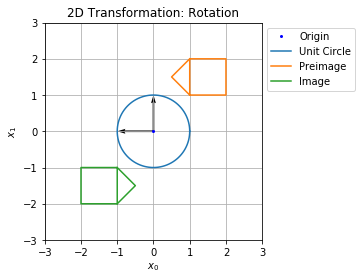

In [12]:
fig = Transform.plot(A, title="Rotation")

## Scale

In [13]:
A = Transform.scale(0.60)
A

array([[0.6, 0. ],
       [0. , 1. ]])

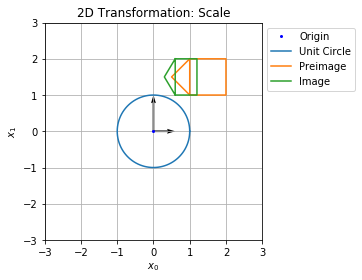

In [14]:
fig = Transform.plot(A, title="Scale")

In [15]:
A = Transform.scale(0.60, axis=1)
A

array([[1. , 0. ],
       [0. , 0.6]])

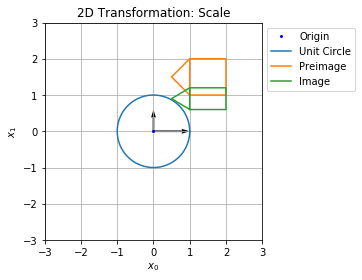

In [16]:
fig = Transform.plot(A, title="Scale")

## Shear

In [17]:
A = Transform.shear(0.25, axis=0)
A

array([[1.  , 0.25],
       [0.  , 1.  ]])

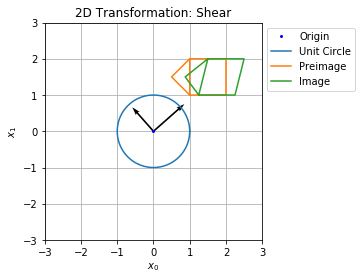

In [18]:
fig = Transform.plot(A, title="Shear")

In [19]:
A = Transform.shear(0.25, axis=1)
A

array([[1.  , 0.  ],
       [0.25, 1.  ]])

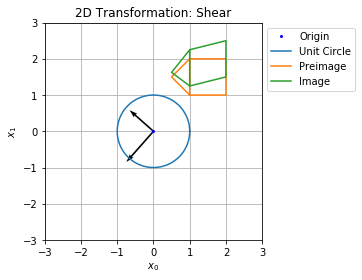

In [20]:
fig = Transform.plot(A, title="Shear")

## Symmetry

In [21]:
A = Transform.symmetry(axis=0)
A

array([[-1.,  0.],
       [ 0.,  1.]])

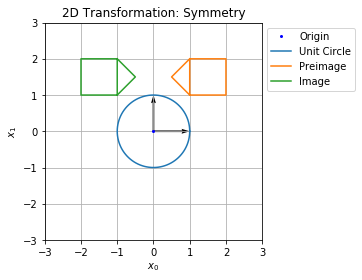

In [22]:
fig = Transform.plot(A, title="Symmetry")

In [23]:
A = Transform.symmetry(axis=1)
A

array([[ 1.,  0.],
       [ 0., -1.]])

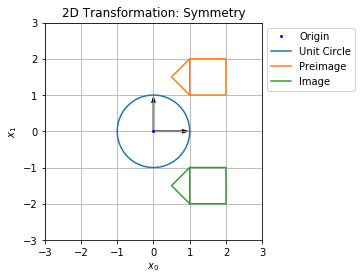

In [24]:
fig = Transform.plot(A, title="Symmetry")

In [25]:
A = Transform.symmetry(axis=None, flip=True)
A

array([[0., 1.],
       [1., 0.]])

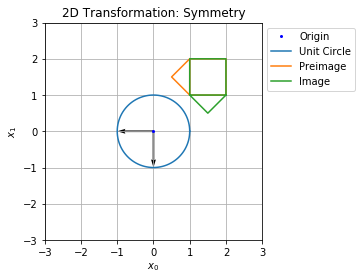

In [26]:
fig = Transform.plot(A, title="Symmetry")

In [27]:
A = Transform.symmetry(axis=[0,1], flip=True)
A

array([[ 0., -1.],
       [-1.,  0.]])

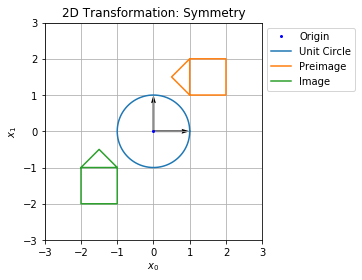

In [28]:
fig = Transform.plot(A, title="Symmetry")

In [29]:
A = Transform.symmetry(axis=[0,1])
A

array([[-1.,  0.],
       [ 0., -1.]])

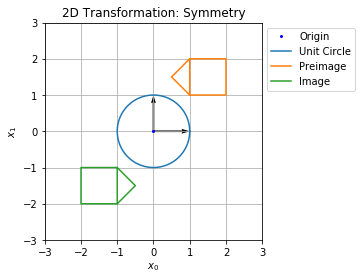

In [30]:
fig = Transform.plot(A, title="Symmetry")

In [31]:
np.allclose(A, Transform.rotation(np.pi))

True